Data Science Project 2 
Titanic Dataset

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

In [2]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
titanic_df = sns.load_dataset('titanic')
print("First 5 rows of the dataset:")
titanic_df.head()

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print("\nDataset Info:")
titanic_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
print("\nStatistical Summary:")
titanic_df.describe()


Statistical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Missing Data Check_up
missing_values = titanic_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values>0])


Missing values in each column:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [7]:
missing_percentage = (titanic_df.isnull().sum() / len(titanic_df)) * 100
print("\nMissing values percentage:")
print(missing_percentage[missing_percentage > 0])


Missing values percentage:
age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64


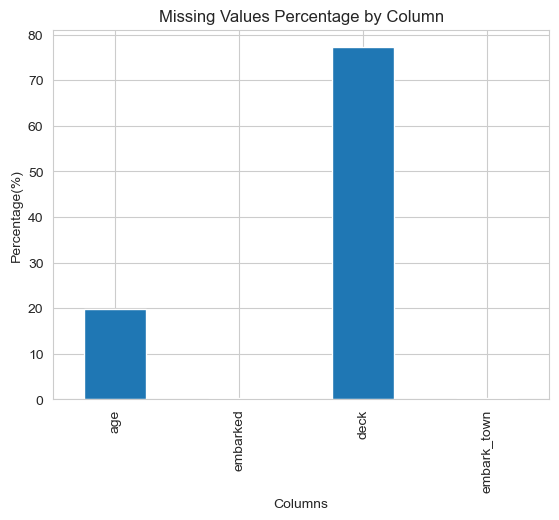

In [8]:
plt.Figure(figsize=(10,6))
missing_percentage[missing_percentage>0].plot(kind='bar')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage(%)')
plt.show()

In [9]:
#data cleaning
# fill missing ages with the median age
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
# fill missing embarked values with the most frequent port
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)
# drop 'deck' column since it contains too many missing values
titanic_df.drop('deck', axis=1, inplace=True)

print("Missing values after cleaning:")
print(titanic_df.isnull().sum())


Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


/var/folders/ff/ft06frx900ng8pn1_09hhzr00000gn/T/ipykernel_10806/3259461626.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
/var/folders/ff/ft06frx900ng8pn1_09hhzr00000gn/T/ipykernel_10806/3259461626.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

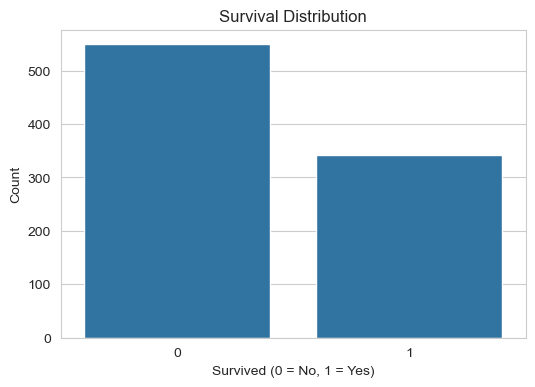

In [10]:
#data visualization
# Survival distribution
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=titanic_df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

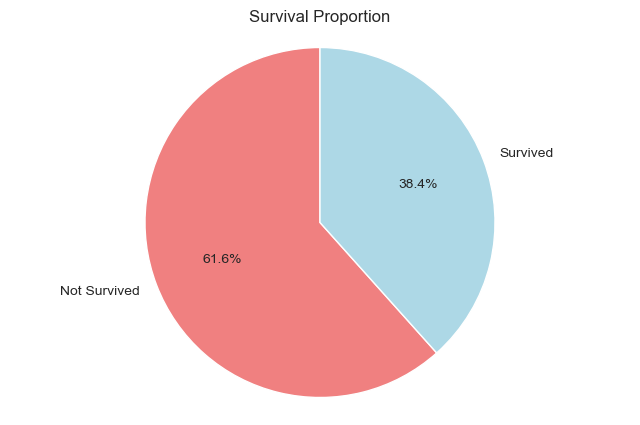

In [11]:
plt.figure(figsize=(8,5))
surival_counts = titanic_df['survived'].value_counts()
plt.pie(surival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Survival Proportion')
plt.axis('equal')
plt.show()

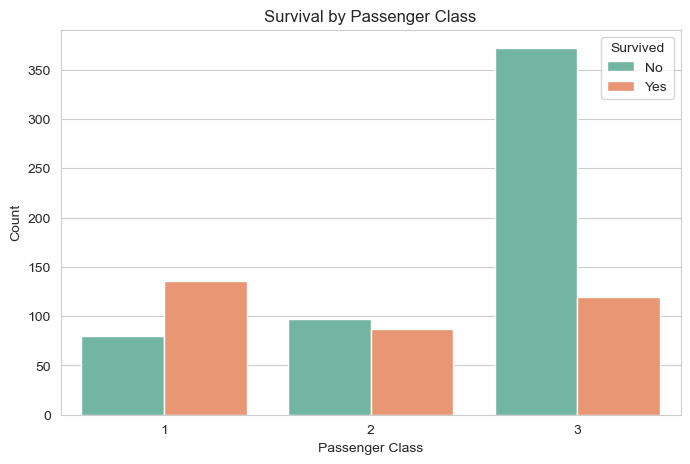

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='pclass', hue='survived', data=titanic_df, palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

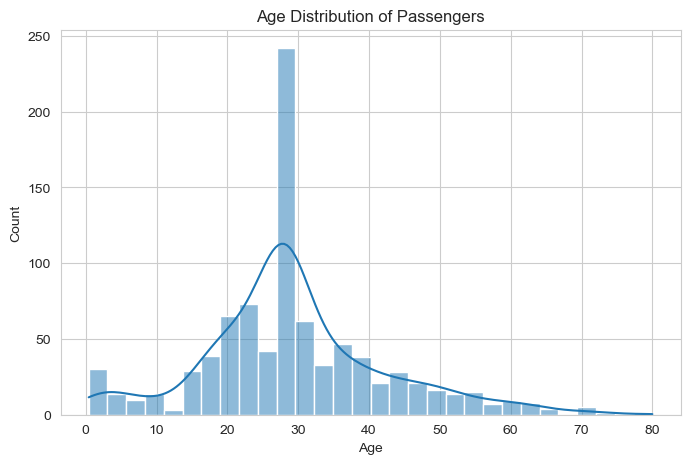

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/var/folders/ff/ft06frx900ng8pn1_09hhzr00000gn/T/ipykernel_10806/3985044669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surival_counts.index, y=surival_counts.values, palette='Set1')


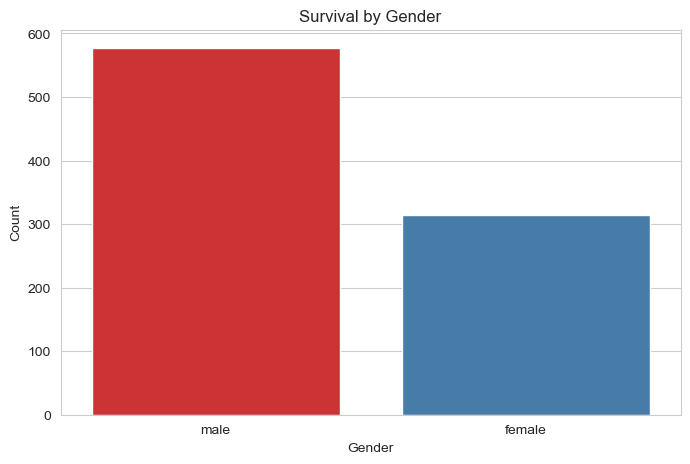

In [14]:
plt.figure(figsize=(8,5))
surival_counts=titanic_df['sex'].value_counts()
sns.barplot(x=surival_counts.index, y=surival_counts.values, palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [16]:
print("Data manipulation and visualization completed successfully!")
print("=" * 50)
print("Summary of Findings:")
print("- The dataset contains 891 entries with 12 columns.")
print("- There are missing values in 'age', 'embarked', and 'deck' columns.")
print("- After cleaning, there are no missing values in the dataset.")
print("- The survival distribution shows that approximately 38% of passengers survived.")
print("- Survival rates were higher in the first class compared to second and third classes.")
print("- The age distribution indicates that most passengers were between 20 and 40 years old.")
print("- More   females survived compared to males, indicating a higher survival rate for females.")


Data manipulation and visualization completed successfully!
Summary of Findings:
- The dataset contains 891 entries with 12 columns.
- There are missing values in 'age', 'embarked', and 'deck' columns.
- After cleaning, there are no missing values in the dataset.
- The survival distribution shows that approximately 38% of passengers survived.
- Survival rates were higher in the first class compared to second and third classes.
- The age distribution indicates that most passengers were between 20 and 40 years old.
- More   females survived compared to males, indicating a higher survival rate for females.
